# ML Test - Correct Answer ✅
ไฟล์นี้เป็นคำตอบที่ถูกต้องสำหรับโจทย์สอบ ML

**Part 1:** Regression - ทำนายราคาบ้าน  
**Part 2:** Classification - ทำนายคุณภาพน้ำ

In [1]:
# Import libraries
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

---
# Part 1: Regression - ทำนายราคาบ้าน
ใช้ข้อมูล: Size, Est_Price, Rooms → ทำนาย Sell_Price

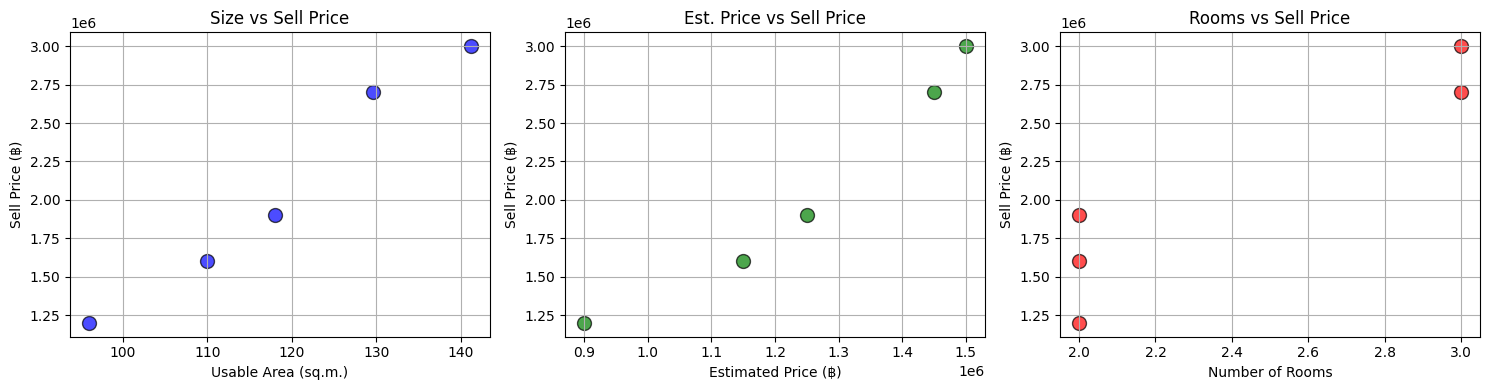

In [2]:
# Data visualization
sizes = [96.0, 118.0, 141.2, 129.6, 110.0]
est_prices = [900000, 1250000, 1500000, 1450000, 1150000]
rooms = [2, 2, 3, 3, 2]
sell_prices = [1200000, 1900000, 3000000, 2700000, 1600000]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.scatter(sizes, sell_prices, color='b', s=100, edgecolors='black', alpha=0.7)
ax1.set_xlabel('Usable Area (sq.m.)')
ax1.set_ylabel('Sell Price (฿)')
ax1.set_title('Size vs Sell Price')
ax1.grid(True)

ax2.scatter(est_prices, sell_prices, color='g', s=100, edgecolors='black', alpha=0.7)
ax2.set_xlabel('Estimated Price (฿)')
ax2.set_ylabel('Sell Price (฿)')
ax2.set_title('Est. Price vs Sell Price')
ax2.grid(True)

ax3.scatter(rooms, sell_prices, color='r', s=100, edgecolors='black', alpha=0.7)
ax3.set_xlabel('Number of Rooms')
ax3.set_ylabel('Sell Price (฿)')
ax3.set_title('Rooms vs Sell Price')
ax3.grid(True)

plt.tight_layout()
plt.show()

## 1.1 สร้างโมเดล Polynomial Regression

In [3]:
# เตรียมข้อมูล
data = {
    'Size': sizes,
    'Est_Price': est_prices,
    'Rooms': rooms,
    'Sell_Price': sell_prices
}
df = pd.DataFrame(data)
print("Dataset:")
print(df)
print()

Dataset:
    Size  Est_Price  Rooms  Sell_Price
0   96.0     900000      2     1200000
1  118.0    1250000      2     1900000
2  141.2    1500000      3     3000000
3  129.6    1450000      3     2700000
4  110.0    1150000      2     1600000



In [4]:
# แบ่งข้อมูล Features และ Target
# ✅ ใช้ทั้ง 3 features: Size, Est_Price, Rooms
X = df[['Size', 'Est_Price', 'Rooms']]
y = df['Sell_Price']

print("Features (X):")
print(X)
print("\nTarget (y):")
print(y)

Features (X):
    Size  Est_Price  Rooms
0   96.0     900000      2
1  118.0    1250000      2
2  141.2    1500000      3
3  129.6    1450000      3
4  110.0    1150000      2

Target (y):
0    1200000
1    1900000
2    3000000
3    2700000
4    1600000
Name: Sell_Price, dtype: int64


In [5]:
# ✅ สร้าง Polynomial Features (degree=2)
# ไม่ต้อง StandardScaler เพราะ Polynomial Regression ทำงานได้ดีกับข้อมูลดิบ
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print(f"Original features: {X.shape[1]}")
print(f"Polynomial features: {X_poly.shape[1]}")
print(f"Feature names: {poly.get_feature_names_out()}")

Original features: 3
Polynomial features: 9
Feature names: ['Size' 'Est_Price' 'Rooms' 'Size^2' 'Size Est_Price' 'Size Rooms'
 'Est_Price^2' 'Est_Price Rooms' 'Rooms^2']


In [6]:
# ✅ Train โมเดล (ใช้ข้อมูลทั้งหมดเพราะมีข้อมูลน้อย)
model = LinearRegression()
model.fit(X_poly, y)

print("Model trained successfully!")
print(f"Coefficients shape: {model.coef_.shape}")
print(f"Intercept: {model.intercept_:.2f}")

Model trained successfully!
Coefficients shape: (9,)
Intercept: 3526510.47


In [7]:
# ✅ ประเมินผลโมเดล
y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = metrics.mean_absolute_error(y, y_pred)

print("=" * 50)
print("Model Evaluation Metrics:")
print("=" * 50)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: ฿{rmse:,.2f}")
print(f"MAE: ฿{mae:,.2f}")
print("=" * 50)

Model Evaluation Metrics:
R² Score: 1.0000
RMSE: ฿0.00
MAE: ฿0.00


In [8]:
# แสดงผลการทำนาย
results = pd.DataFrame({
    'Size': sizes,
    'Est_Price': est_prices,
    'Rooms': rooms,
    'Actual_Price': y,
    'Predicted_Price': y_pred.round(0),
    'Error': (y - y_pred).abs().round(0)
})

print("\nPrediction Results:")
print(results.to_string(index=False))


Prediction Results:
 Size  Est_Price  Rooms  Actual_Price  Predicted_Price  Error
 96.0     900000      2       1200000        1200000.0    0.0
118.0    1250000      2       1900000        1900000.0    0.0
141.2    1500000      3       3000000        3000000.0    0.0
129.6    1450000      3       2700000        2700000.0    0.0
110.0    1150000      2       1600000        1600000.0    0.0


## 1.2 ทำนายราคาบ้านใหม่
**ข้อมูลใหม่:** Size=125, Est_Price=1,300,000, Rooms=3

In [9]:
# ✅ เตรียมข้อมูลใหม่
new_data = pd.DataFrame({
    'Size': [125],
    'Est_Price': [1300000],
    'Rooms': [3]
})

print("New data to predict:")
print(new_data)

New data to predict:
   Size  Est_Price  Rooms
0   125    1300000      3


In [10]:
# ✅ Transform ข้อมูลใหม่ (ใช้ poly object เดิม - ห้าม fit ใหม่!)
new_data_poly = poly.transform(new_data)

print(f"Transformed features shape: {new_data_poly.shape}")

Transformed features shape: (1, 9)


In [11]:
# ✅ Predict (ใช้โมเดลจาก 1.1 - ห้ามเทรนใหม่!)
predicted_price = model.predict(new_data_poly)

print("=" * 50)
print("Prediction for New House:")
print("=" * 50)
print(f"Size: {new_data['Size'].values[0]} sq.m.")
print(f"Estimated Price: ฿{new_data['Est_Price'].values[0]:,.0f}")
print(f"Rooms: {new_data['Rooms'].values[0]}")
print(f"\n🏠 Predicted Sell Price: ฿{predicted_price[0]:,.0f}")
print("=" * 50)

Prediction for New House:
Size: 125 sq.m.
Estimated Price: ฿1,300,000
Rooms: 3

🏠 Predicted Sell Price: ฿2,096,660


---
# Part 2: Classification - ทำนายคุณภาพน้ำ
ใช้ Decision Tree เพื่อทำนายว่าน้ำปลอดภัย (is_safe) หรือไม่

In [23]:
# สมมติว่าโหลดข้อมูลจาก Kaggle แล้ว
# ในที่นี้จะใช้ข้อมูลตัวอย่าง (ถ้ามีไฟล์จริงให้ uncomment บรรทัดล่าง)
# df = pd.read_csv('waterQuality1.csv')

# สำหรับการทดสอบ ถ้าไม่มีไฟล์ให้ skip cell นี้
try:
    df = pd.read_csv('waterQuality1.csv')
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
except FileNotFoundError:
    print("⚠️ File 'waterQuality1.csv' not found. Please download from Kaggle first.")
    print("Dataset: https://www.kaggle.com/datasets/mssmartypants/water-quality")

Dataset loaded successfully!
Shape: (7999, 21)

First 5 rows:
   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003

In [24]:
# ตรวจสอบข้อมูล
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float

In [25]:
# ✅ ทำความสะอาดข้อมูล
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
# categorical_columns = df.select_dtypes(include=['object']).columns
# label_encoder = LabelEncoder()

# for feature in categorical_columns:
#     df[feature] = label_encoder.fit_transform(df[feature])

# จัดการ missing values (#NUM! หรืออื่นๆ)
df = df.replace('#NUM!', np.nan)
df = df.dropna()

print(f"After cleaning: {df.shape}")
print("\nCleaned data:")
print(df.head())

After cleaning: (7996, 21)

Cleaned data:
   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

  

In [26]:
# ✅ แบ่งข้อมูล Features และ Target
X = df.drop('is_safe', axis=1)
y = df['is_safe']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())

Features shape: (7996, 20)
Target shape: (7996,)

Target distribution:
is_safe
0    7084
1     912
Name: count, dtype: int64


In [27]:
# ✅ แบ่ง Train-Test และ Scale ข้อมูล
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

Train set: (6396, 20)
Test set: (1600, 20)


## 2.1 หา max_depth ที่ดีที่สุด

In [28]:
# ✅ หา max_depth ที่ให้ accuracy สูงสุด
best_depth = 0
best_acc = 0
depth_results = []

for depth in range(1, 30):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train_scaled, y_train)
    y_pred = tree.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    depth_results.append({'depth': depth, 'accuracy': acc})
    
    if acc > best_acc:
        best_acc = acc
        best_depth = depth

print("=" * 50)
print(f"Best max_depth: {best_depth}")
print(f"Best Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")
print("=" * 50)

Best max_depth: 16
Best Accuracy: 0.9625 (96.25%)


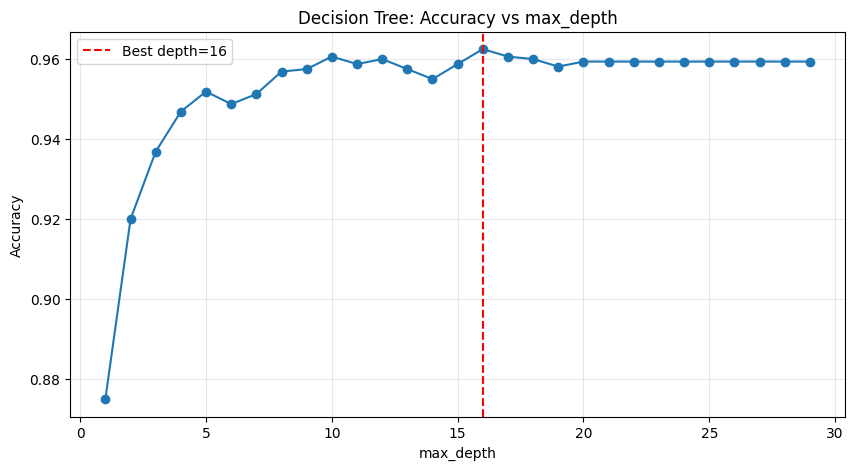

In [29]:
# Plot accuracy vs depth
depth_df = pd.DataFrame(depth_results)
plt.figure(figsize=(10, 5))
plt.plot(depth_df['depth'], depth_df['accuracy'], marker='o')
plt.axvline(x=best_depth, color='r', linestyle='--', label=f'Best depth={best_depth}')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs max_depth')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [30]:
# ✅ Train โมเดลสุดท้ายด้วย best_depth
final_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_tree.fit(X_train_scaled, y_train)

# ประเมินผล
y_train_pred = final_tree.predict(X_train_scaled)
y_test_pred = final_tree.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("\nFinal Model Performance:")
print(f"Train Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")


Final Model Performance:
Train Accuracy: 0.9967 (99.67%)
Test Accuracy: 0.9625 (96.25%)


In [31]:
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1400
           1       0.88      0.81      0.84       200

    accuracy                           0.96      1600
   macro avg       0.93      0.90      0.91      1600
weighted avg       0.96      0.96      0.96      1600


Confusion Matrix:
[[1377   23]
 [  37  163]]


In [45]:
# Visualize Decision Tree (optional)
try:
    from graphviz import Source
    
    PROJECT_ROOT_DIR = "."
    IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "tree_images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    
    export_graphviz(
        final_tree,
        out_file=os.path.join(IMAGES_PATH, "water_quality_tree.dot"),
        feature_names=X.columns,
        class_names=['Unsafe', 'Safe'],
        rounded=True,
        filled=True
    )
    
    print(f"Tree visualization saved to {IMAGES_PATH}/water_quality_tree.dot")
    Source.from_file(os.path.join(IMAGES_PATH, "water_quality_tree.dot"))
except Exception as e:
    print(f"Could not visualize tree: {e}")

Tree visualization saved to .\tree_images/water_quality_tree.dot


## 2.2 ทำนายข้อมูลใหม่

In [46]:
# ✅ ข้อมูลใหม่ที่ต้องการทำนาย
# ⚠️ ต้องมีจำนวน features เท่ากับข้อมูลเทรน
new_sample = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

print(f"New sample features: {len(new_sample[0])}")
print(f"Expected features: {X.shape[1]}")

if len(new_sample[0]) == X.shape[1]:
    print("✅ Feature count matches!")
else:
    print(f"❌ Feature mismatch! Need {X.shape[1]} features.")

New sample features: 20
Expected features: 20
✅ Feature count matches!


In [52]:
print("New sample:")
print(new_sample)
print()

# ✅ Transform ข้อมูลใหม่ (ต้อง scale ก่อน predict!)
new_sample_scaled = scaler.transform(new_sample)

print("Scaled new sample:")
print(new_sample_scaled)

New sample:
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

Scaled new sample:
[[-0.52334803 -1.60400375 -0.63650428 -1.29159514 -1.18233759 -0.84536621
  -0.91423687 -1.23218944 -1.78402774  0.54810077 -0.87330061 -1.71865065
  -1.75602719 -2.30709403 -1.73746207 -0.92909571 -1.25601801 -1.72558444
  -1.02896046 -1.6620498 ]]


c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
# ✅ Predict
prediction = final_tree.predict(new_sample_scaled)
prediction_proba = final_tree.predict_proba(new_sample_scaled)

print("=" * 50)
print("Prediction Results:")
print("=" * 50)
print(f"Predicted class: {prediction[0]}")
print(f"Interpretation: {'✅ Safe Water' if prediction[0] == '1' else '❌ Unsafe Water'}")
print(f"\nProbabilities:")
print(f"  - Unsafe (0): {prediction_proba[0][0]:.4f} ({prediction_proba[0][0]*100:.2f}%)")
print(f"  - Safe (1): {prediction_proba[0][1]:.4f} ({prediction_proba[0][1]*100:.2f}%)")
print("=" * 50)

Prediction Results:
Predicted class: 1
Interpretation: ✅ Safe Water

Probabilities:
  - Unsafe (0): 0.0000 (0.00%)
  - Safe (1): 1.0000 (100.00%)


---
## 🎯 สรุปจุดสำคัญ

### Part 1 - Regression
✅ ใช้ทั้ง 3 features (Size, Est_Price, Rooms)  
✅ ใช้ PolynomialFeatures(degree=2)  
✅ ไม่ต้อง StandardScaler สำหรับ Polynomial Regression  
✅ ใช้โมเดลเดิมสำหรับ predict ข้อมูลใหม่ (ห้ามเทรนใหม่!)  
✅ ใช้ poly.transform() สำหรับข้อมูลใหม่ (ห้าม fit_transform!)

### Part 2 - Classification
✅ แบ่ง train-test split  
✅ ใช้ StandardScaler (fit_transform กับ train, transform กับ test)  
✅ หา best max_depth ด้วย loop  
✅ Transform ข้อมูลใหม่ก่อน predict (scaler.transform!)  
✅ ใช้โมเดลเดิม predict (ห้ามเทรนใหม่!)